In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data

In [5]:

file = open("dataset-full2.csv", "r")

df = pd.read_csv(file, names=['Class', 'Age', 'Age mean', 'Menopause','Tumor-size', 'Tumor-size mean', 'Inv-nodes', 'Inv-nodes mean', 'Node-caps', 'Deg-malig', 'Breast', 'Breast-quad', 'Irradiat'])

In [6]:
features = ['Age mean', 'Tumor-size mean', 'Inv-nodes mean']

#Separating out the features
x = df.loc[:, features].values

#Separating out the target
y = df.loc[:, ['Class']]

x = StandardScaler().fit_transform(x)
print (x)

[[-1.64777909e+00  4.63592558e-01 -4.56613071e-01]
 [-6.57726946e-01 -4.73421375e-01 -4.56613071e-01]
 [-6.57726946e-01 -4.73421375e-01 -4.56613071e-01]
 [ 1.32237733e+00 -9.41928342e-01 -4.56613071e-01]
 [-6.57726946e-01 -2.34744924e+00 -4.56613071e-01]
 [ 1.32237733e+00 -9.41928342e-01 -4.56613071e-01]
 [ 3.32325194e-01 -4.91440874e-03 -4.56613071e-01]
 [ 1.32237733e+00 -4.73421375e-01 -4.56613071e-01]
 [-6.57726946e-01  2.33762042e+00 -4.56613071e-01]
 [-6.57726946e-01 -4.73421375e-01 -4.56613071e-01]
 [-6.57726946e-01 -2.34744924e+00 -4.56613071e-01]
 [ 3.32325194e-01 -4.91440874e-03 -4.56613071e-01]
 [ 1.32237733e+00 -1.41043531e+00 -4.56613071e-01]
 [ 3.32325194e-01 -4.91440874e-03 -4.56613071e-01]
 [-6.57726946e-01  4.63592558e-01 -4.56613071e-01]
 [ 1.32237733e+00  4.63592558e-01 -4.56613071e-01]
 [-6.57726946e-01 -9.41928342e-01 -4.56613071e-01]
 [ 3.32325194e-01  4.63592558e-01 -4.56613071e-01]
 [ 1.32237733e+00  4.63592558e-01 -4.56613071e-01]
 [ 3.32325194e-01  4.63592558e-

In [7]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
print(principalDf)

     principal component 1  principal component 2
0                 0.437175              -1.531465
1                -0.458686              -0.807881
2                -0.458686              -0.807881
3                -1.301923               0.980805
4                -1.723332              -1.263238
5                -1.301923               0.980805
6                -0.406062               0.257221
7                -0.985761               1.094645
8                 1.438284              -0.124845
9                -0.458686              -0.807881
10               -1.723332              -1.263238
11               -0.406062               0.257221
12               -1.618084               0.866966
13               -0.406062               0.257221
14                0.173637              -0.580202
15               -0.353438               1.322323
16               -0.774847              -0.921720
17               -0.089900               0.371061
18               -0.353438               1.322323


In [8]:
finalDf = pd.concat([principalDf, df[['Class']]], axis = 1)
print(finalDf)

     principal component 1  principal component 2                 Class
0                 0.437175              -1.531465  no-recurrence-events
1                -0.458686              -0.807881  no-recurrence-events
2                -0.458686              -0.807881  no-recurrence-events
3                -1.301923               0.980805  no-recurrence-events
4                -1.723332              -1.263238  no-recurrence-events
5                -1.301923               0.980805  no-recurrence-events
6                -0.406062               0.257221  no-recurrence-events
7                -0.985761               1.094645  no-recurrence-events
8                 1.438284              -0.124845  no-recurrence-events
9                -0.458686              -0.807881  no-recurrence-events
10               -1.723332              -1.263238  no-recurrence-events
11               -0.406062               0.257221  no-recurrence-events
12               -1.618084               0.866966  no-recurrence

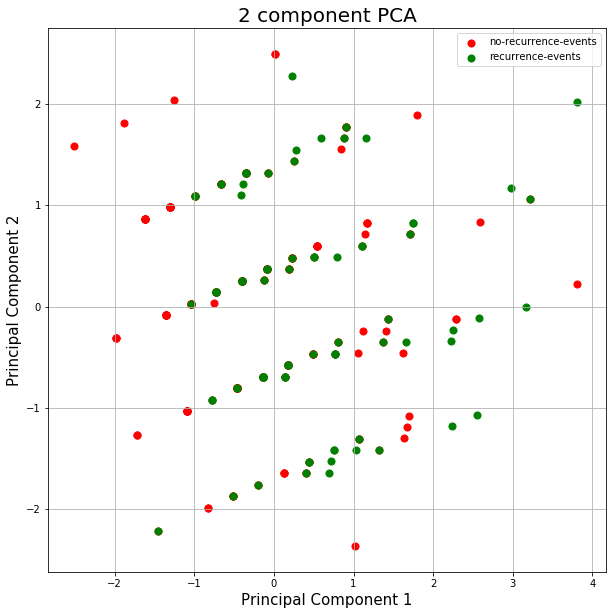

In [12]:
fig = plt.figure(figsize= (10,10))
ax = fig.add_subplot(111) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['no-recurrence-events', 'recurrence-events']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Class'] == target
    ax.scatter(  finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [11]:
#Values Variance for each principal component analised
pca.explained_variance_ratio_

array([0.38140474, 0.3299326 ])